## Дизайн эксперимента

Чтобы запустить эксперимент, нужно разработать его `дизайн`. Под дизайном мы подразумеваем описание действий по подготовке, проведению и оценке результатов эксперимента. Важно фиксировать `дизайн` до начала эксперимента и в дальнейшем придерживаться его.

Если эксперимент оказался неудачным, можно либо что-то в нём изменить и запустить повторно, либо перейти к `проверке следующих гипотез`. \
В жизни `люди часто верят в положительный результат`, поскольку заинтересованы в успешности эксперимента и успели потратить на разработку новой функциональности много времени и ресурсов. \
Поэтому если по результатам эксперимента `есть эффект`, они склонны сразу `принимать этот результат`. \
А если `эффекта нет`, то `перебирают различные способы` иначе оценить эксперимент, пока не получат желаемое. \
При таком подходе `есть риск получить большое количество неверных решений`. \
И после десятка «успешных» экспериментов эффективность компании не изменится или даже снизится.

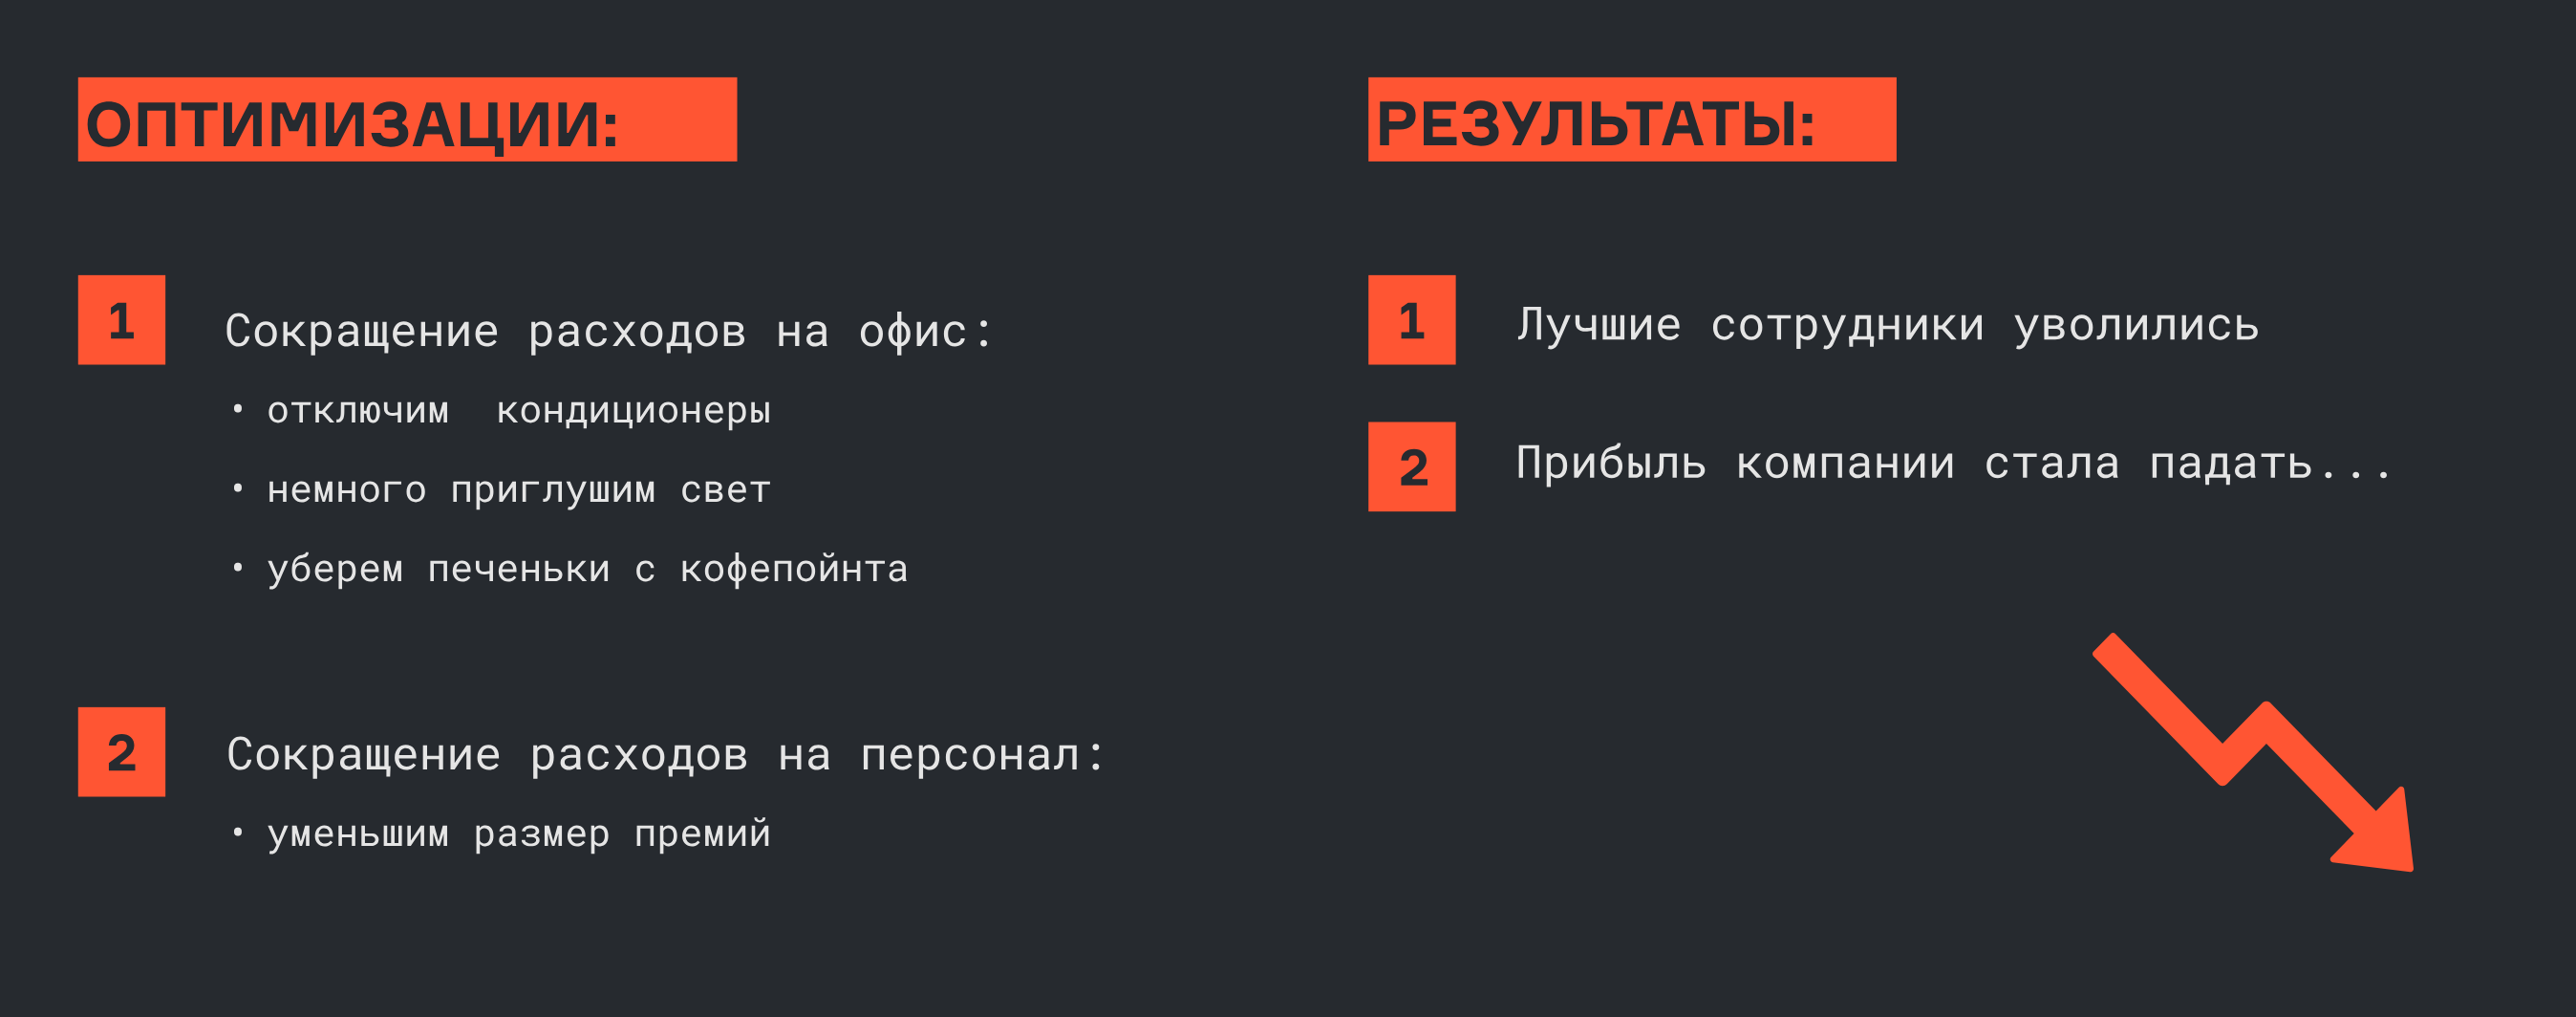

Вернёмся к составлению дизайна. Что он должен содержать? Можно выделить три основных этапа эксперимента, которые должны быть описаны в дизайне:

1. **Формирование гипотезы**. Определяем, что хотим изменить, на что это повлияет и с помощью какой метрики будем измерять это влияние.
   
2. **Проведение эксперимента**. Нужно зафиксировать время проведения эксперимента, и то, как будут формироваться контрольная и экспериментальная группы.
   
3. **Оценка результатов**. Описать, как будут обрабатываться данные и приниматься решение.

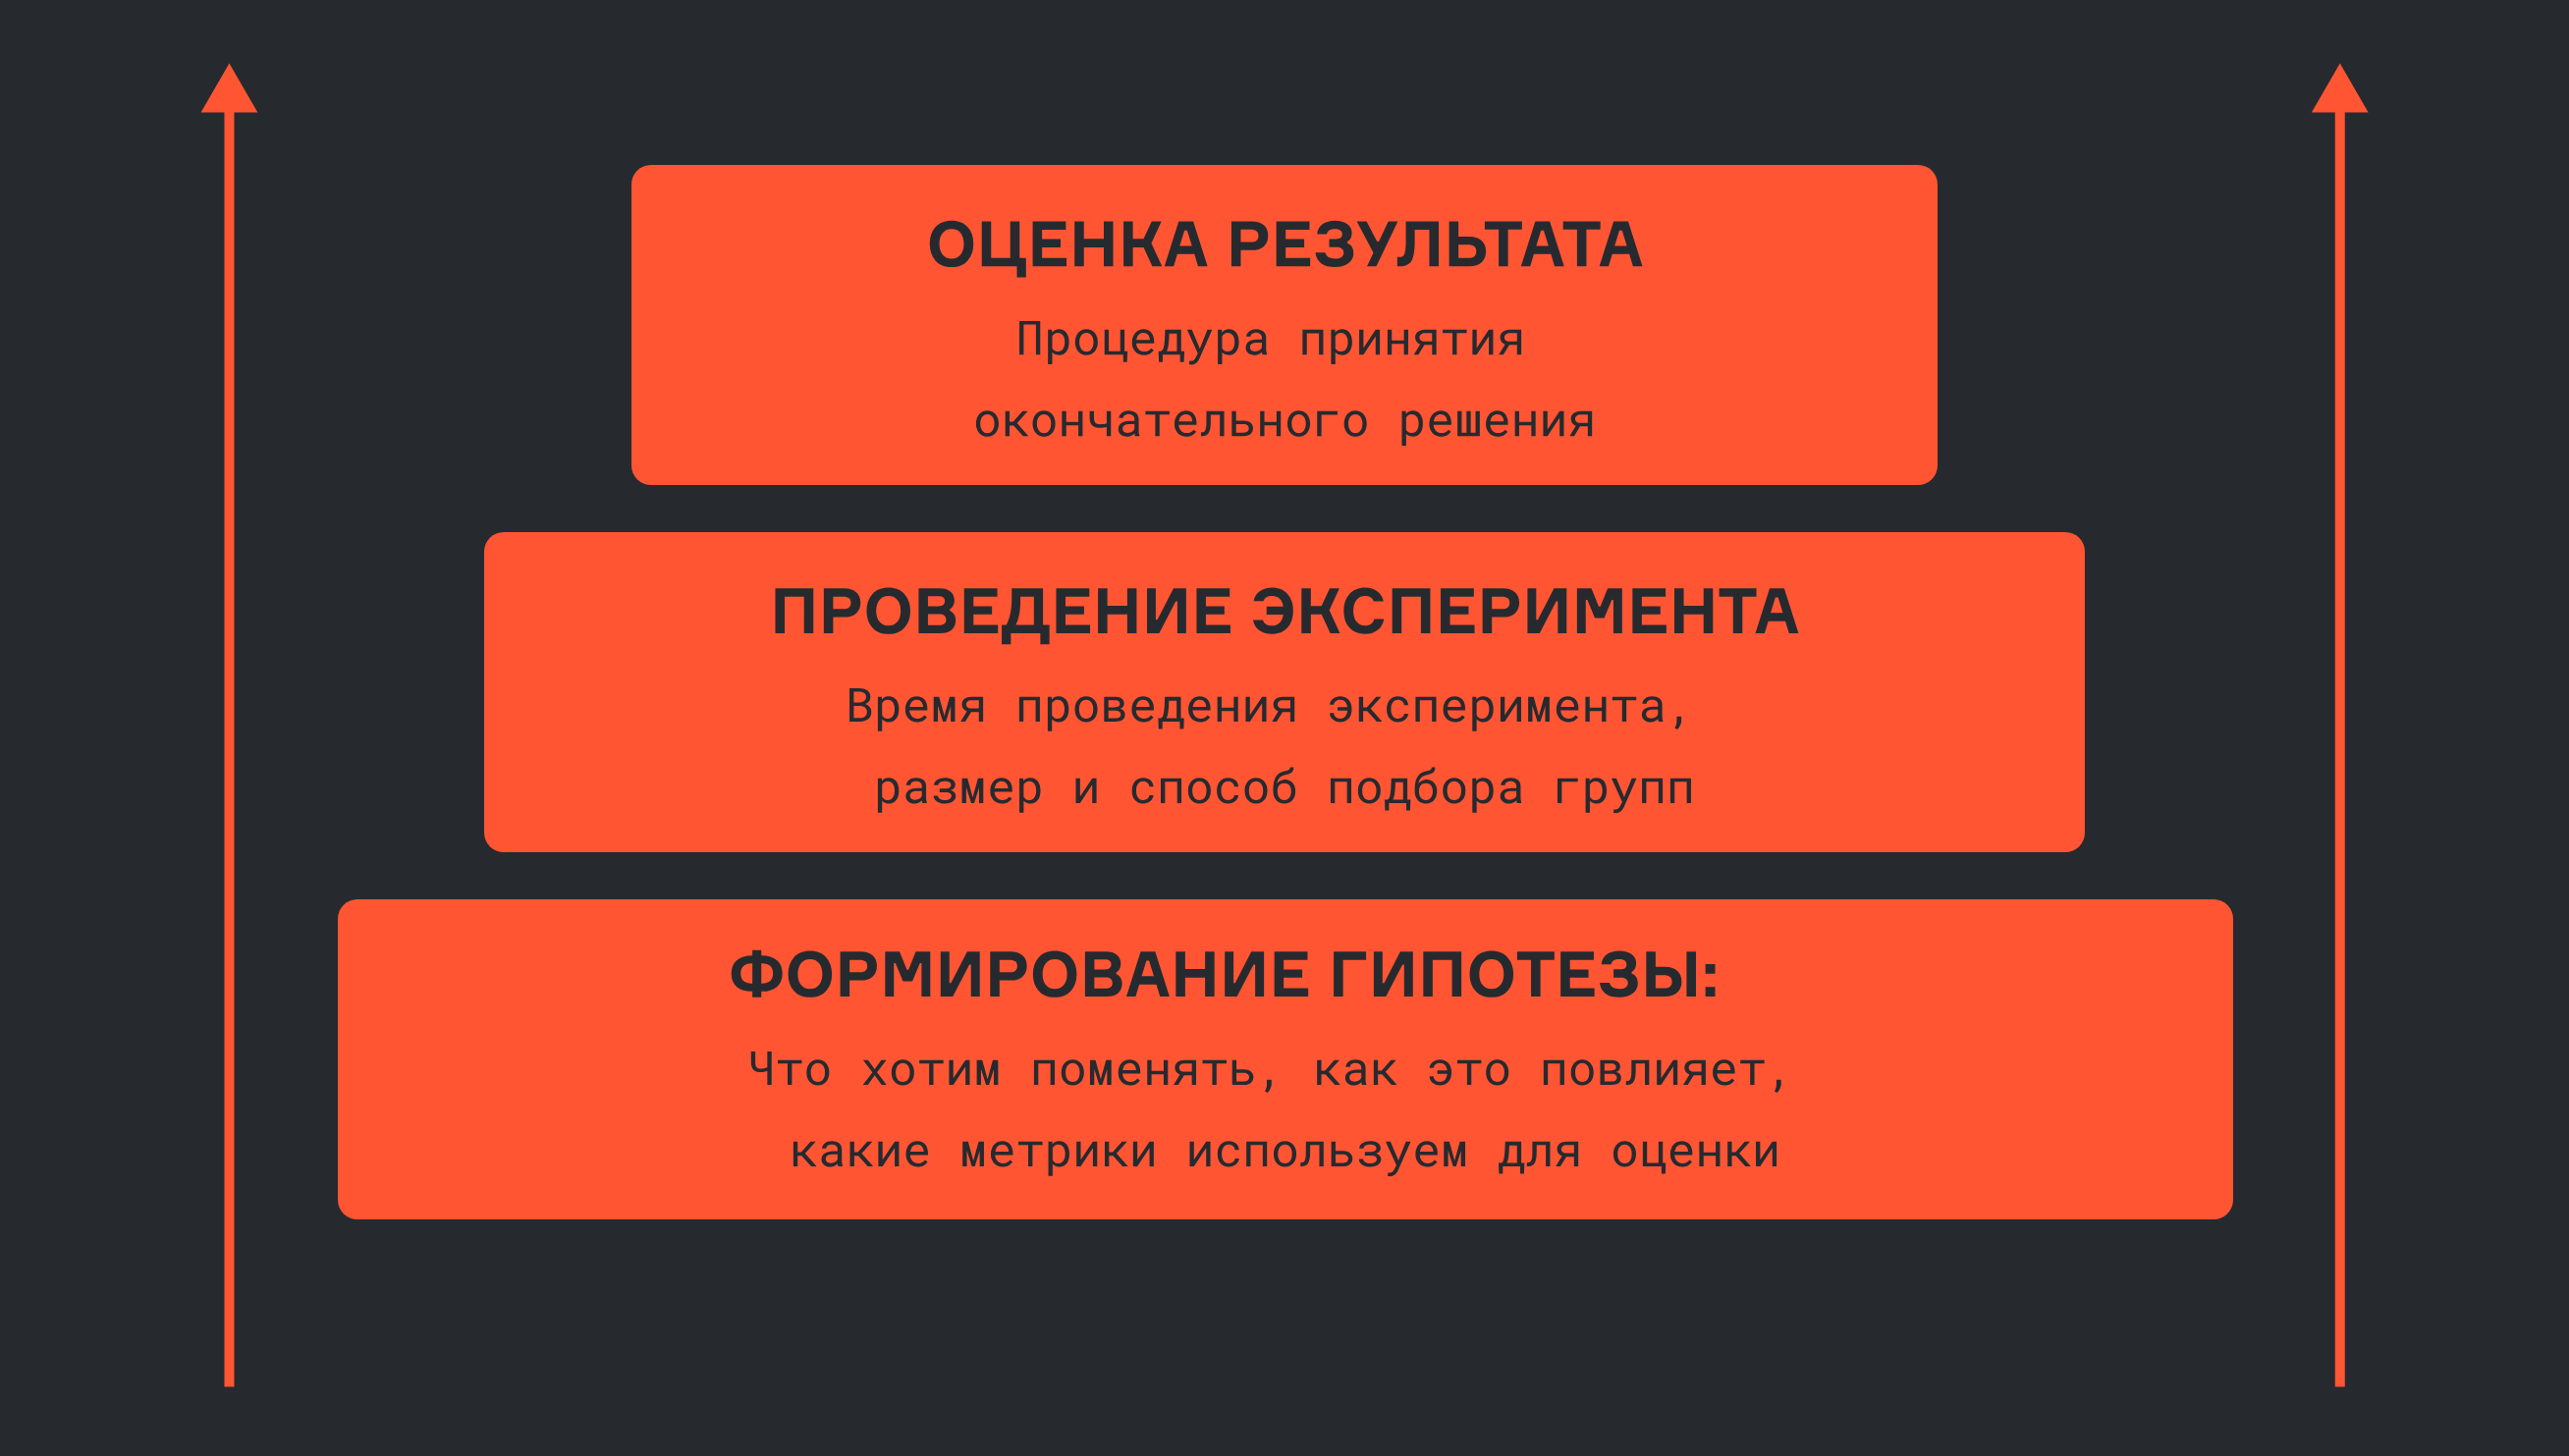

Для примера возьмем такой эксперимент: \
**"Мы хотим заменить бэкенд сайта на новый. Считаем, что эта замена не повлияет на производительность сайта. \
Изменения будем замерять с помощью метрики среднее время обработки запросов."**

Есть разные техники оценки результата, со многими из них мы познакомимся в следующих уроках. \
В этом эксперименте нам будет достаточно изученного ранее `t-test'а`. `Уровень значимости определим равным 0.05`. \
Осталось определиться, как сформировать `контрольную` и `экспериментальную` группу и выбрать период проведения эксперимента.

### Вопрос :
Представьте, что вы провели A/B эксперимент, в котором проверяли, увеличится ли средняя выручка при изменении дизайна сайта. \
Получили результат – средняя выручка статистически значимо не увеличилась. Что делать?

`Верно:`
- Разработать другую версию дизайна и запустить новый эксперимент
- Отказаться от изменения дизайна сайта и перейти к проверке других гипотез

`Неверно:`
- Увеличить `продолжительность эксперимента` на несколько дней, чтобы собрать больше данных и принять более точное решение
- `Увеличить уровень значимости`, чтобы он стал больше `p_value`, и эффект стал `статистически значимым` \
 **(Нельзя менять дизайн эксперимента, т.к. это приведет к увеличению доли ложноположительных результатов)**

## Размер групп

Чем `больше` размер групп, тем `больше данных` мы получаем. С одной стороны, это позволит `принять более точное решение`. \
С другой стороны, это `увеличит потери` в случае, если `эксперимент оказался неудачным`. \

Если в новую версию бэкенда закралась ошибка и сайт перестанет работать у всех пользователей экспериментальной группы, то чем `больше размер групп`, тем `больше людей не смогут сделать заказ`. 
И ещё, чем `больше размер групп`, тем `меньше экспериментов` мы можем проводить. \
Это может быть важно, если накопилось много гипотез и хочется побыстрее их все проверить.

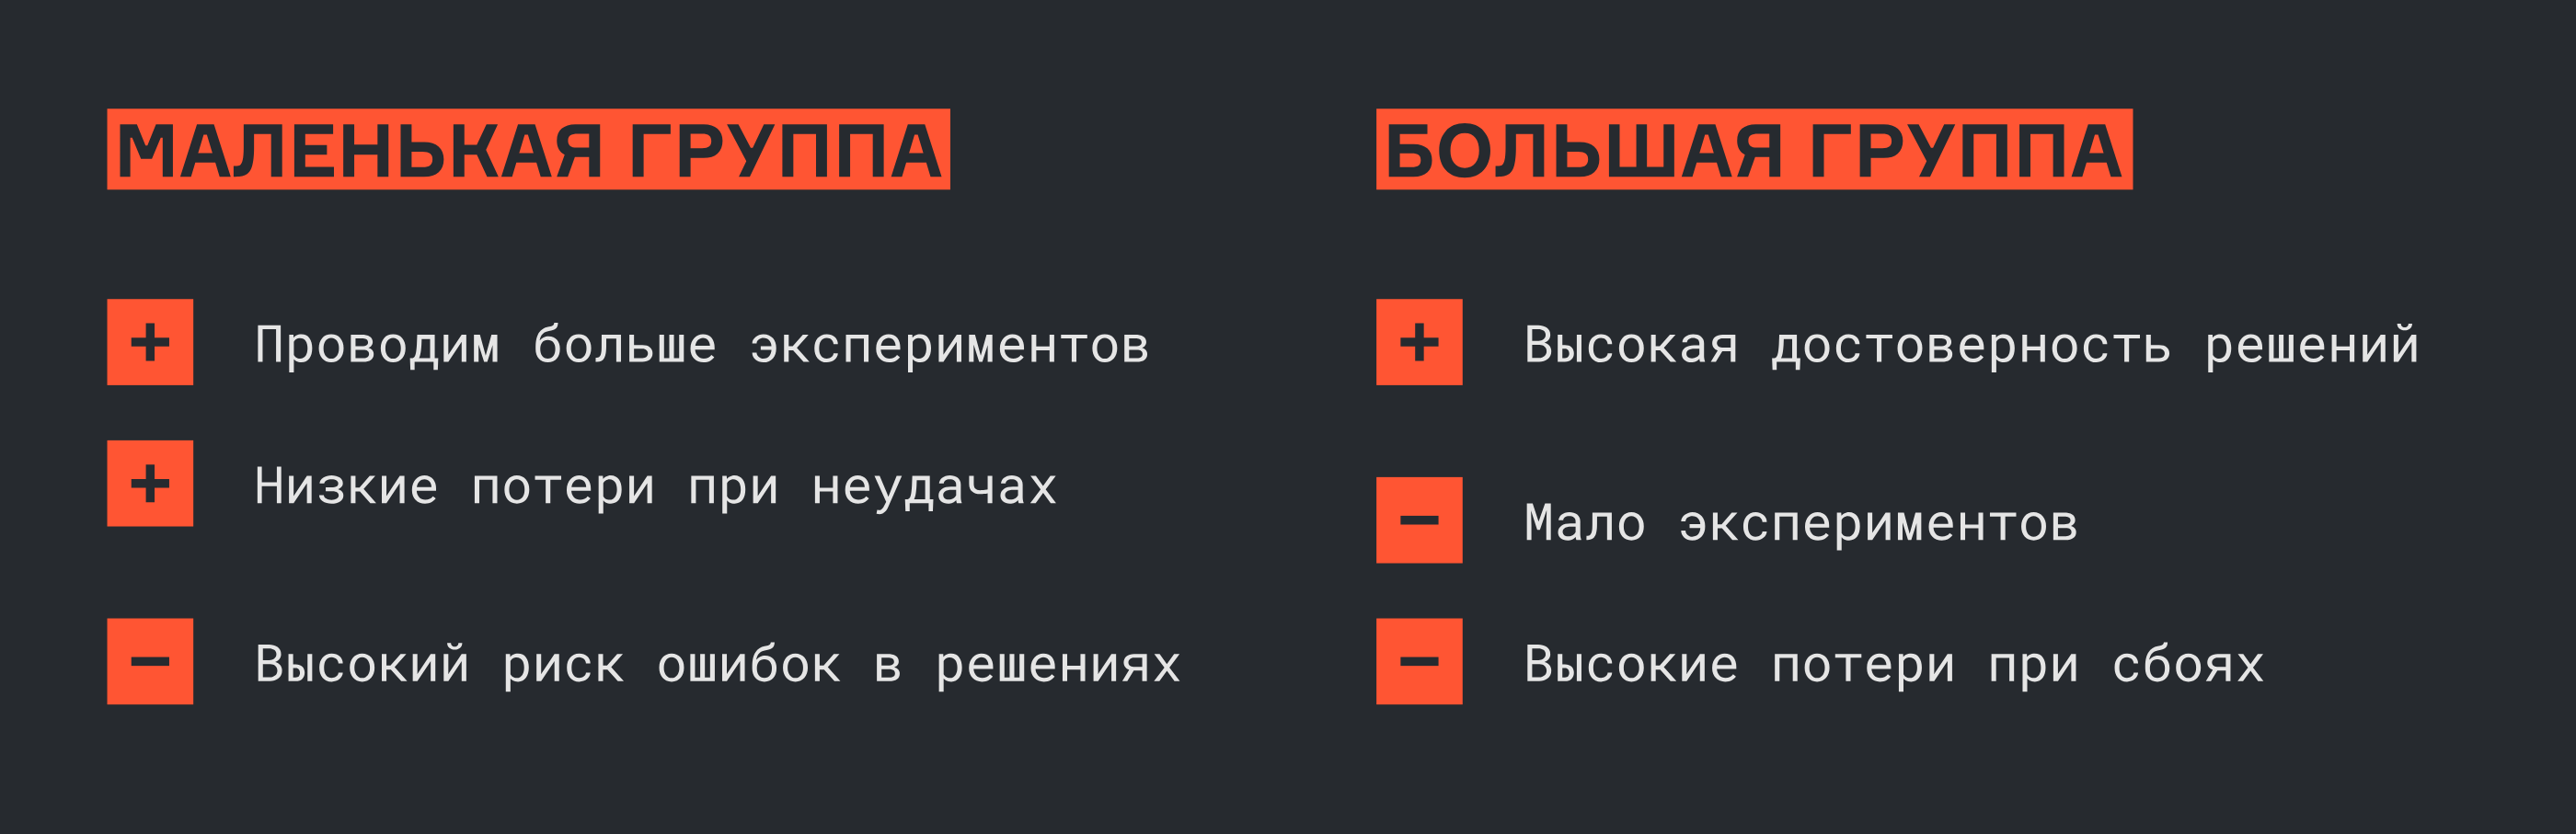

У групп `больших` и `маленьких` размеров есть свои преимущества и недостатки, нужно искать компромисс. Как это сделать?

Для гипотезы о равенстве средних двух выборок есть формула, которая выражает размер групп ***n*** через ряд других параметров:

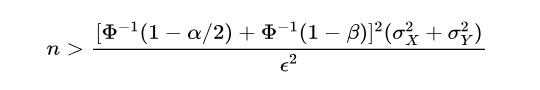

Давайте разберёмся с тем, что стоит в правой части неравенства:

`α` − вероятности ошибки первого рода, она же уровень значимости. Мы зафиксировали её в дизайне равной `0.05`.

`β` − вероятности ошибки второго рода, с какой вероятностью мы скажем что эффекта нет, когда на самом деле он есть. \
`(Часто его берут равным 0.1 или 0.2)`.

`σ(x)` и `σ(y)` − `стандартные отклонения` в контрольной и экспериментальной группах соответственно. \
Эти значения можно оценить, подсчитав `стандартные отклонения метрики по историческим данным`.

`ϵ` − `эффект`, который мы ожидаем получить от эксперимента. \
В эксперименте с бэкендом `ожидаемый эффект` может быть, например, 5 миллисекунд. \
Это означает, что если окажется `верна альтернативная гипотеза`, и `истинный эффект будет 5 миллисекунд или более`, то мы обнаружим его
с вероятностью не менее `1 - β`.

`Φ(−1)` − это обозначение специальной функции из статистики (обратная функция нормального распределения), её значения можно получить, поменяв для функции распределения горизонтальную и вертикальную ось местами.


При `α = 0.05` получаем Φ(−1)(1 - α/2)=`1.96`, \
а при `β = 0.1` получаем Φ(−1)(1 - β) = `1.28`

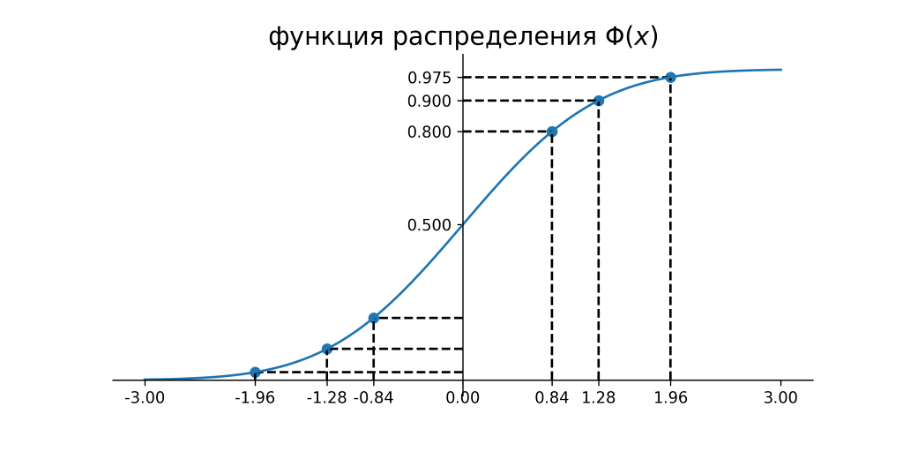

Получается, мы можем вычислить размер выборки, если:
- `определим допустимые вероятности ошибок`
- `ожидаемый размер эффекта`
- `оценим стандартное отклонение метрики`
  
Рекомендуем использовать `размер выборки на 5-10%` больше рассчитанного по формуле, так как в формуле используются не точные значения стандартных отклонений. \
А их оценки, которые имеют погрешность и могут немного искажать результат.

### Вопрос:
Сколько пользователей нужно взять в экспериментальную группу, чтобы отлавливать эффект в 20 копеек? \
Известно, что для эффекта в 10 копеек нужно 200000 пользователей. Вероятности ошибок и стандартные отклонения фиксированы.

***Ответ:***
50000 пользователей \
Чем больший эффект мы хотим быть способны обнаружить, тем меньший размер групп нам требуется. \
В формуле ожидаемый эффект стоит в квадрате. Поэтому при увеличении ожидаемого эффекта в 2 раза, размер групп уменьшится в 4 раза.

### Какие выводы можем сделать:

- `При увеличении стандартного отклонения в 2 раза, необходимый размер групп увеличивается в 4 раза` \
  (чем больше разброс данных, тем сложнее отличить сигнал от шума в данных)

- `При уменьшении вероятности ошибки первого рода, размер выборки увеличивается` \
  (если мы хотим ошибаться реже, нужно собирать больше данных для большей надежности)

- `Чтобы быть способным поймать меньший эффект, нужно больше данных`

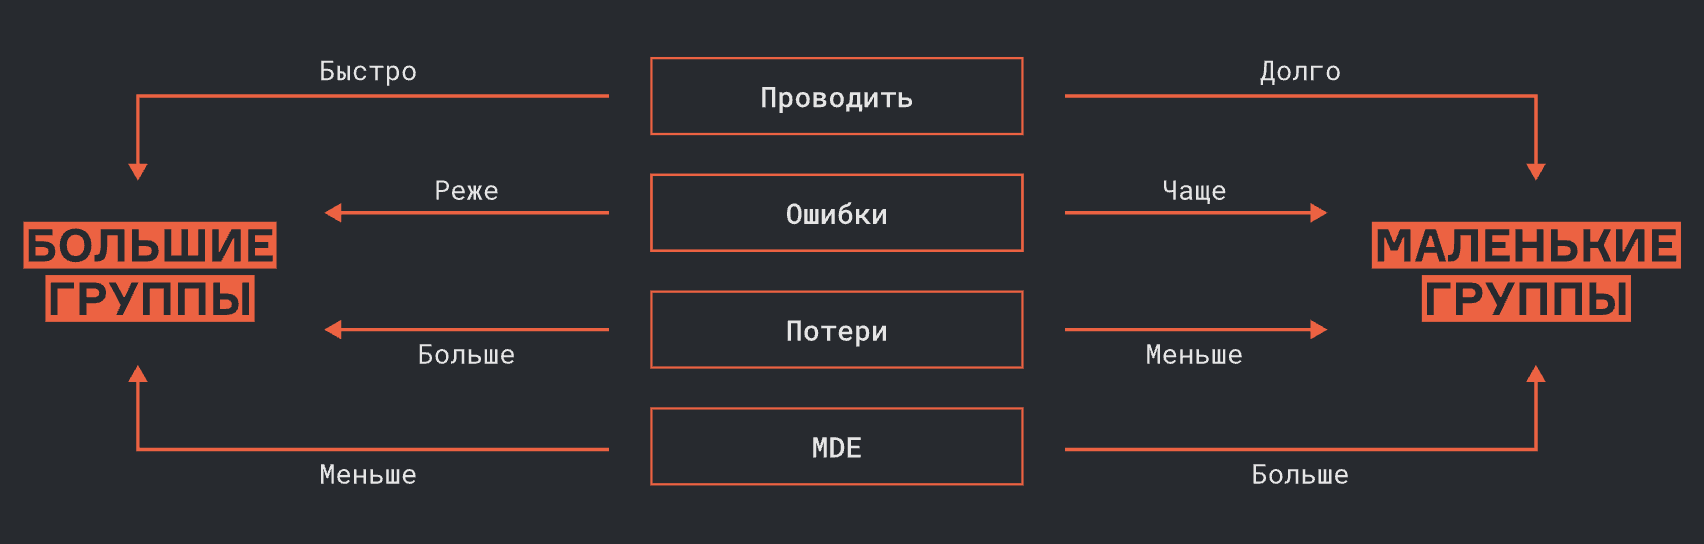

## Размер групп

Мы выяснили, что `размер групп` можно оценить, зная `вероятность ошибок`, `стандартное отклонение выборки` и `ожидаемый эффект`. \
Значения вероятностей фиксируют до начала эксперимента, стандартное отклонение оценивают по историческим данным. \
А как определить `ожидаемый размер эффект`? Этот вопрос становится особенно интригующим, когда оценивают деньги

Конкретного алгоритма определения размера ожидаемого эффекта не существует, но есть некоторые подходы, которые могут быть полезны:

1. **Оттолкнуться от минимального размера эффекта, который мы сможем распознать при тесте на всех пользователях**. \
   `Мы не сможем распознать эффект меньшего размера`.
   
2. **Использовать опыт прошедших тестов**. Если ранее проводились похожие тесты, можем использовать `результаты их оценок` для определения целевого эффекта.
   
3. **Исходить из затрат на проведение теста**. Например, нет смысла выбирать `MDE` меньше, чем себестоимость эксперимента.

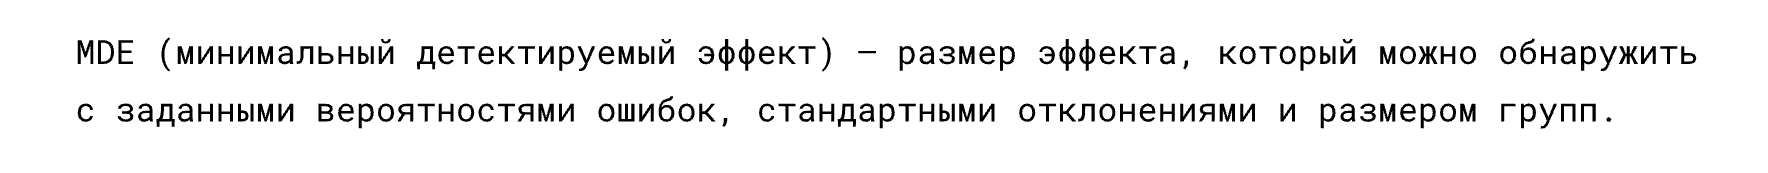

Представьте, что некоторый менеджер отвечает за развитие рекламных компаний, и ему нужно оценить, как повлияет на выручку рассылка писем с новой рекламой. \
Менеджер приходит к аналитику, чтобы выяснить, скольким людям нужно отправить письма. \
Между ними происходит диалог:

`Менеджер:` Мне нужно провести эксперимент с рассылкой писем, чтобы узнать, как это влияет на выручку. Скольким людам мне нужно отправить письма? \
`Аналитик:` А какой ожидается эффект?

`Менеджер:` Мы ожидаем, что выручка вырастет \
`Аналитик:` Вырастет на сколько?

`Менеджер:` Не знаю, чем больше, тем лучше \
`Аналитик:` Переформулирую вопрос. Какой эффект мы хотим быть способны обнаружить в эксперименте?

`Менеджер:` Любой эффект, естественно \
`Аналитик:` Даже на 1 копейку?

`Менеджер:` Да, мы хотим знать о любом эффекте, каким бы маленьким он ни был \
`Аналитик:` Чтобы поймать сколь угодно малый эффект нужно отправить бесконечно много писем

`Менеджер:` У нас нет столько пользователей. А если взять 10 копеек? \
`Аналитик:` Для этого потребуется 200 000 пользователей \
`Менеджер:` Уже лучше, а если взять 20 копеек?

Из диалога выше видно, что выбор размера групп — это некоторый компромисс между расходами на проведение эксперимента и точностью полученных результатов. \
Чтобы понять, какой минимальный эффект мы можем обнаружить для фиксированного размера групп, нужно вычислить MDE.

Формула для MDE легко выводится из формулы для размера выборки:

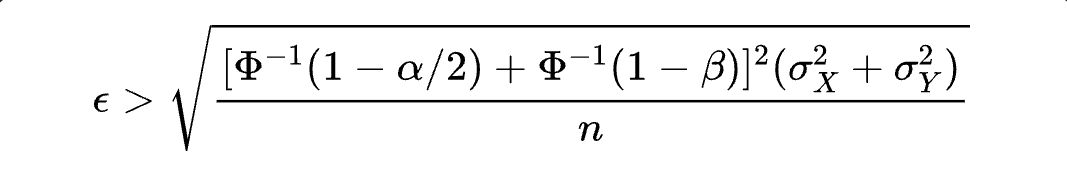

Теперь у нас есть первый способ оценить MDE: посчитать, какой минимальный эффект способны обнаружить, если мы возьмём в эксперимент всех доступных пользователей. \
Допустим, MDE оказался равен 100 рублей, а наш эксперимент больше чем на 10 рублей среднюю выручку не увеличит. \
Мы не сможем обнаружить эффект такого размера, что же делать? Нужно попробовать поменять дизайн эксперимента с целью получить приемлемое значением MDE. \
Для этого можно попробовать увеличить продолжительность эксперимента, чтобы в нем успели поучаствовать больше пользователей, выбрать другую метрику или применить способы снижения дисперсии данных. \
Как выбирать метрику и что делать для снижения дисперсии обсудим в следующих уроках.

Если не удалось получить приемлемое значение MDE, то от проведения эксперимента с таким дизайном лучше отказаться, так как обнаружить эффект, скорее всего, не удастся.

Рассмотрим другую ситуацию: MDE для эксперимента на всех пользователях оказался равен 1 рублю, наш эксперимент потенциально может показать такой эффект. Как в этом случае выбрать параметры для эксперимента? 

Мы можем предварительно оценить ожидаемый в эксперименте эффект. Если у нас уже есть опыт запуска подобных экспериментов, посмотрим, какие в них были эффекты, затем оценим значение ожидаемого эффекта, исходя из имеющихся данных.

Также можно оттолкнуться от затрат на внедрение изменений. Например, если отправка рекламного письма стоит 2 рубля, необходимо, чтобы средняя выручка увеличилась не менее, чем на 2 рубля — иначе обнаруженное увеличение выручки не оправдает внедрение. Соответственно, минимальный ожидаемый эффект определим равным 2 рублям.

### Вопрос:

Мы хотим проверить гипотезу об увеличении средней выручки с покупателя. \
По историческим данным мы вычислили, что оценка среднего значения метрики равна 1230 рублей, а оценка стандартного отклонения равна 200 рублей. \
Размер групп в эксперименте фиксирован и равен 1000. \
Эффекты какого размера можем отловить на уровне значимости 0.05 и допустимой вероятности ошибки II рода 0.1 ?